In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, cross_validate,GridSearchCV
from scipy.stats import probplot
#from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold

In [2]:
#Loading Dataset
df = pd.read_csv('C:\\Users\pnish\OneDrive\Documents\Projects\Cars\car_data.csv')
print(df.head())

   Unnamed: 0         make fuel_type aspiration num_of_doors   body_style  \
0           1  alfa-romero       gas        std          two  convertible   
1           2  alfa-romero       gas        std          two  convertible   
2           3  alfa-romero       gas        std          two    hatchback   
3           4         audi       gas        std         four        sedan   
4           5         audi       gas        std         four        sedan   

  drive_wheels engine_location  wheel_base  length  ...  engine_type  \
0          rwd           front        88.6   168.8  ...         dohc   
1          rwd           front        88.6   168.8  ...         dohc   
2          rwd           front        94.5   171.2  ...         ohcv   
3          fwd           front        99.8   176.6  ...          ohc   
4          4wd           front        99.4   176.6  ...          ohc   

   num_of_cylinders  engine_size fuel_system compression_ratio  horsepower  \
0              four       

In [3]:
#Initial analysis
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel_type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   body_style         205 non-null    object 
 6   drive_wheels       205 non-null    object 
 7   engine_location    205 non-null    object 
 8   wheel_base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb_weight        205 non-null    int64  
 13  engine_type        205 non-null    object 
 14  num_of_cylinders   205 non-null    object 
 15  engine_size        205 non-null    int64  
 16  fuel_system        205 non

(205, 23)

In [4]:
#Removing the first redundant column 'Unnamed: 0'
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
#Function to get the rows that have integer values but the data type is not int
def non_nums(col):
    '''Funtion to return that the index of the rows that has non integer values from the column mentioned
    Args:
        Column name as string to be considered to check whether numerical value or not.
    Returns:
        A list of row indices where the value is not an integer '''
    non_digit_rows=[]
    total_non_digit=0
    for i in range(df.shape[0]):
        if df.loc[i,col].isdigit()==False:
            non_digit_rows.append(i)
            total_non_digit+=1
    print(f'The total number of non digit rows in the column {col} are: {total_non_digit}')
    return non_digit_rows

In [6]:
#From the analysis above it was found that 3 features that have numerical entries have object as their data type.
cols=['horsepower','peak_rpm','price']
for i in cols:
    non_int_rows=non_nums(i)
    print('The rows in the ',i, ' that are not having integer values are:',non_int_rows)
    print(df.loc[non_int_rows,i])

The total number of non digit rows in the column horsepower are: 2
The rows in the  horsepower  that are not having integer values are: [130, 131]
130    ?
131    ?
Name: horsepower, dtype: object
The total number of non digit rows in the column peak_rpm are: 2
The rows in the  peak_rpm  that are not having integer values are: [130, 131]
130    ?
131    ?
Name: peak_rpm, dtype: object
The total number of non digit rows in the column price are: 4
The rows in the  price  that are not having integer values are: [9, 44, 45, 129]
9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object


In [7]:
#Removing all the rows with missing values
print(df.shape)
print((df[df.columns]=='?').sum())
new_df=df.copy()
new_df.drop([9, 44, 45, 129,130,131],inplace=True)
print(new_df.shape)
print((new_df[new_df.columns]=='?').sum())

(205, 22)
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64
(199, 22)
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
h

C:\Users\pnish\.conda\envs\tf\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
#Finding whether any other rows have '?'
for i in new_df.columns:
    print(new_df[new_df[i]=='?'][i])

Series([], Name: make, dtype: object)
Series([], Name: fuel_type, dtype: object)
Series([], Name: aspiration, dtype: object)
27    ?
63    ?
Name: num_of_doors, dtype: object
Series([], Name: body_style, dtype: object)
Series([], Name: drive_wheels, dtype: object)
Series([], Name: engine_location, dtype: object)
Series([], Name: wheel_base, dtype: float64)
Series([], Name: length, dtype: float64)
Series([], Name: width, dtype: float64)
Series([], Name: height, dtype: float64)
Series([], Name: curb_weight, dtype: int64)
Series([], Name: engine_type, dtype: object)
Series([], Name: num_of_cylinders, dtype: object)
Series([], Name: engine_size, dtype: int64)
Series([], Name: fuel_system, dtype: object)
Series([], Name: compression_ratio, dtype: float64)
Series([], Name: horsepower, dtype: object)
Series([], Name: peak_rpm, dtype: object)
Series([], Name: city_mpg, dtype: int64)
Series([], Name: highway_mpg, dtype: int64)
Series([], Name: price, dtype: object)


In [9]:
#Removing the row 27,63 which have missing values
new_df.drop([27,63],inplace=True)

In [10]:
# Confirming whether all the rows with '?' removed
for i in new_df.columns:
    print(new_df[new_df[i]=='?'][i])
new_df.shape

Series([], Name: make, dtype: object)
Series([], Name: fuel_type, dtype: object)
Series([], Name: aspiration, dtype: object)
Series([], Name: num_of_doors, dtype: object)
Series([], Name: body_style, dtype: object)
Series([], Name: drive_wheels, dtype: object)
Series([], Name: engine_location, dtype: object)
Series([], Name: wheel_base, dtype: float64)
Series([], Name: length, dtype: float64)
Series([], Name: width, dtype: float64)
Series([], Name: height, dtype: float64)
Series([], Name: curb_weight, dtype: int64)
Series([], Name: engine_type, dtype: object)
Series([], Name: num_of_cylinders, dtype: object)
Series([], Name: engine_size, dtype: int64)
Series([], Name: fuel_system, dtype: object)
Series([], Name: compression_ratio, dtype: float64)
Series([], Name: horsepower, dtype: object)
Series([], Name: peak_rpm, dtype: object)
Series([], Name: city_mpg, dtype: int64)
Series([], Name: highway_mpg, dtype: int64)
Series([], Name: price, dtype: object)


(197, 22)

In [11]:
#Changing the data types to int
print(new_df.price.dtypes)
new_df=new_df.astype({'price':np.int64,'peak_rpm':'int64','horsepower':'int64'})
print(new_df[['price','peak_rpm','horsepower']].dtypes)

object
price         int64
peak_rpm      int64
horsepower    int64
dtype: object


In [12]:
#Storing the column names of categorical feature and conitnuous features as separate varaibles
cat_var = [key for key in dict(new_df.dtypes) if dict(new_df.dtypes)[key] in ['object']]
#cat_var1=new_df.select_dtypes(include=['object']).columns  #Another method to get categorical columns
print(cat_var)
var=list(df.columns)
num_var=list(set(var)-set(cat_var))
num_var.remove('price')

['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']


['peak_rpm', 'width', 'length', 'height', 'compression_ratio', 'horsepower', 'engine_size', 'wheel_base', 'curb_weight', 'highway_mpg', 'city_mpg']


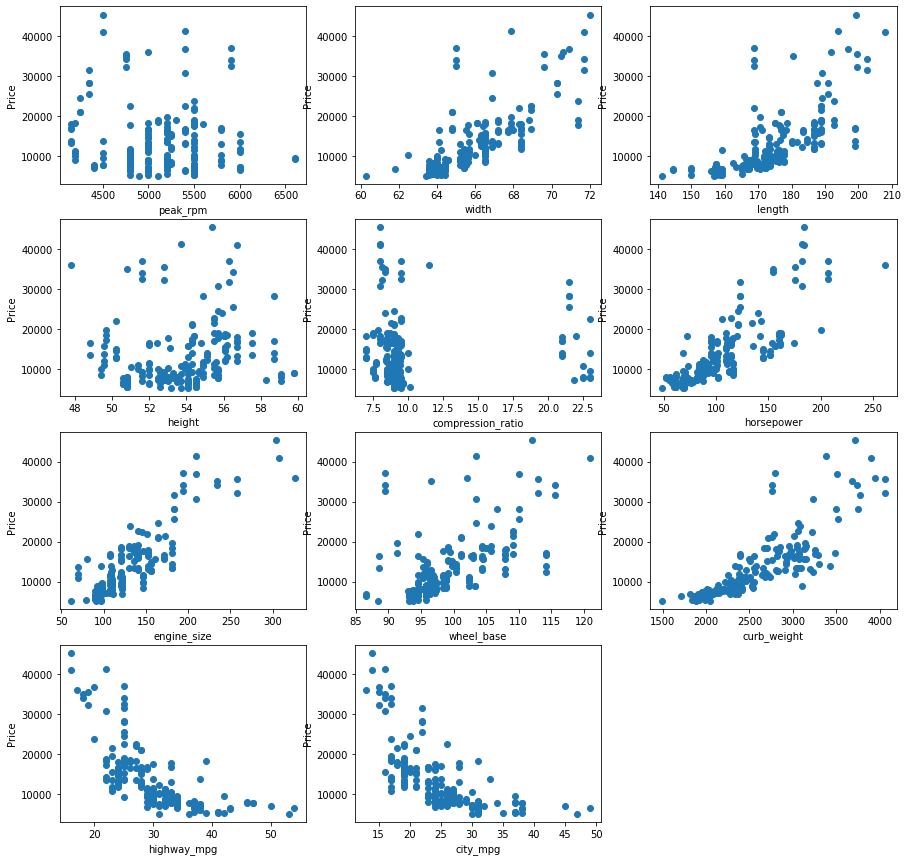

In [13]:
#EXPLORATORY DATA ANALYSIS
#Relationship between all continuous regressors and target variable
#fig,ax=plt.subplots(3,4,sharey=True)
print(num_var)
f = plt.figure(figsize=(15,15))
for i,var in enumerate(num_var):
    ax1=plt.subplot(4,3,i+1,xlabel=var,ylabel='Price')
    ax1.scatter(var,'price',data=new_df)

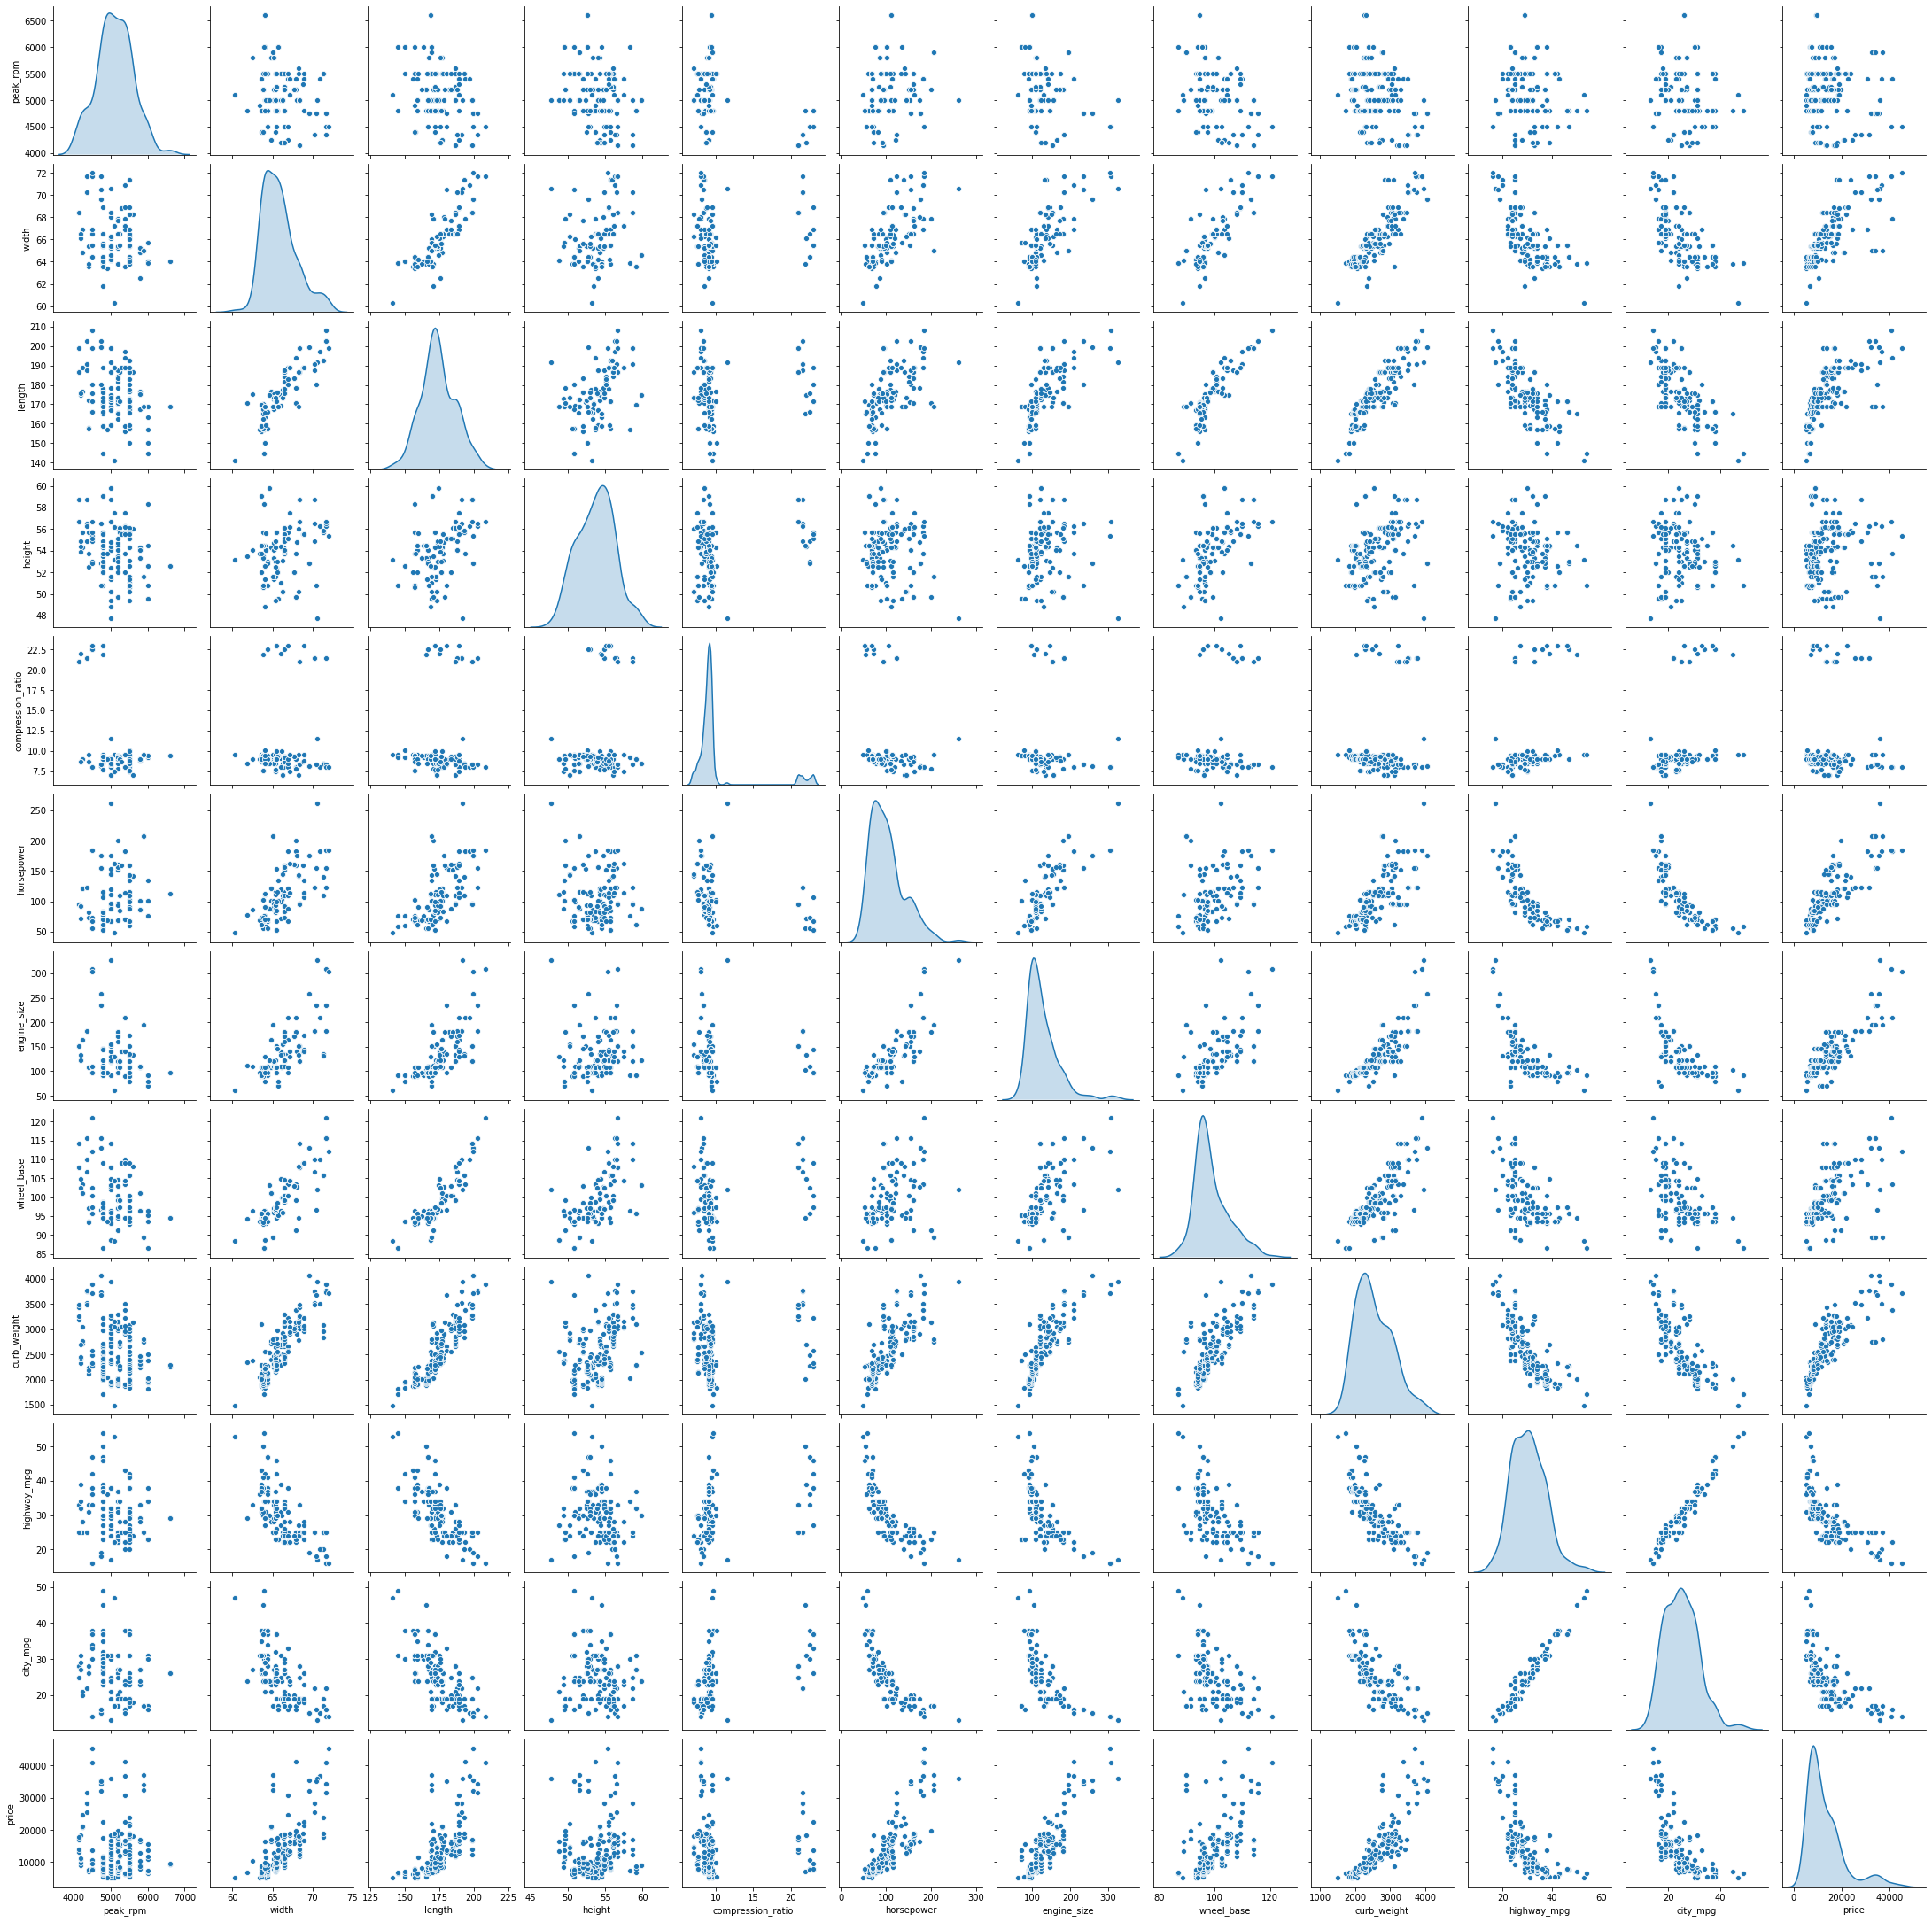

In [14]:
#Plotting sns pairplot
num_var.append('price')
sns.pairplot(data=new_df[num_var],diag_kind='kde')
plt.show()

From the above plots its seen most of the variables are normally distributed except for few which are right skewed (engine_size,compression_ratio,horsepower,price). Most of the features are correlated with each other and these can be eliminated. Features that are not correlated are height, peak_rpm, width, compression_ratio,horsepower,wheel_base,price

In [15]:
#Continuous variables description
new_df[num_var].describe()

,peak_rpm,width,length,height,compression_ratio,horsepower,engine_size,wheel_base,curb_weight,highway_mpg,city_mpg,price
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,5118.020305,65.889848,174.218274,53.783249,10.128528,103.604061,126.994924,98.850254,2558.456853,30.629442,25.152284,13279.644670
std,481.035914,2.116046,12.373547,2.445899,3.938099,37.639205,41.913114,6.110827,521.782047,6.836259,6.437863,8010.334218
min,4150.000000,60.300000,141.100000,47.800000,7.000000,48.000000,61.000000,86.600000,1488.000000,16.000000,13.000000,5118.000000
25%,4800.000000,64.100000,166.800000,52.000000,8.600000,70.000000,97.000000,94.500000,2145.000000,25.000000,19.000000,7775.000000
50%,5200.000000,65.500000,173.200000,54.100000,9.000000,95.000000,119.000000,97.000000,2414.000000,30.000000,24.000000,10345.000000
75%,5500.000000,66.900000,183.500000,55.600000,9.400000,116.000000,145.000000,102.400000,2935.000000,34.000000,30.000000,16503.000000
max,6600.000000,72.000000,208.100000,59.800000,23.000000,262.000000,326.000000,120.900000,4066.000000,54.000000,49.000000,45400.000000


From above it is concluded that the data Needed scalling since the variables are of different ranges and variances

In [16]:
#Removing peak_rpm, compression_ratio, height, wheel_base since they do not have a linear relationship with y
non_lin_fea=['peak_rpm','compression_ratio','height','wheel_base']
new_df.drop(non_lin_fea, axis=1,inplace=True)

In [17]:
for i in non_lin_fea:
    num_var.remove(i)
num_var

['width',
 'length',
 'horsepower',
 'engine_size',
 'curb_weight',
 'highway_mpg',
 'city_mpg',
 'price']

In [18]:
#Removing price from the list
num_var.remove('price')

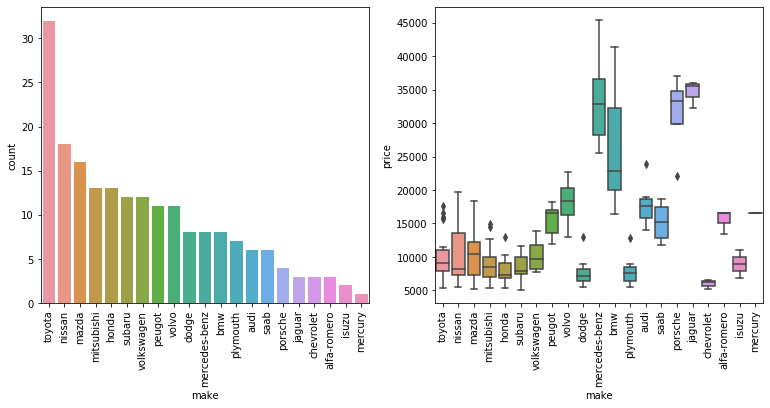

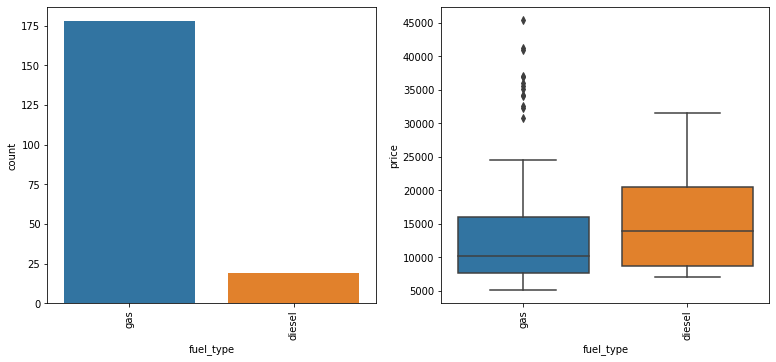

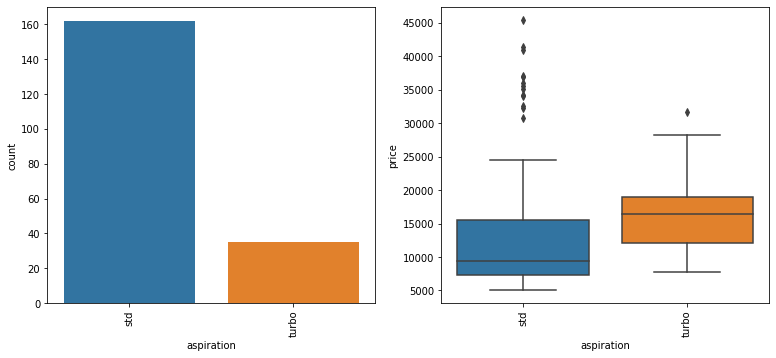

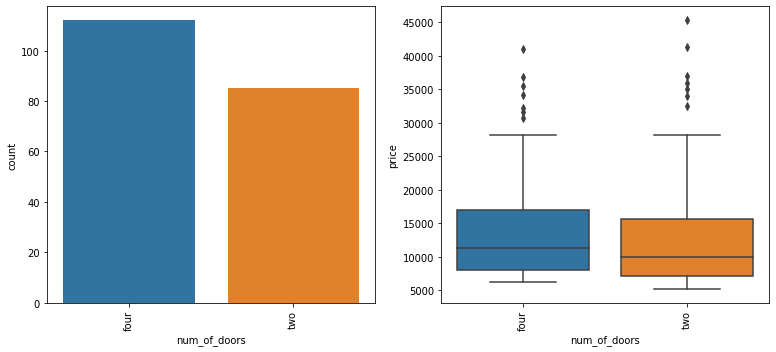

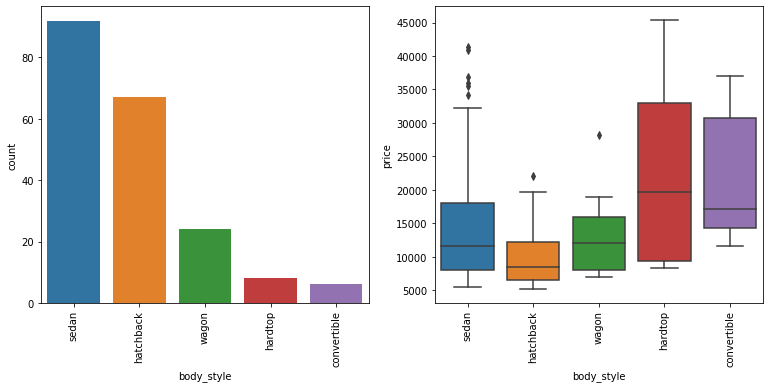

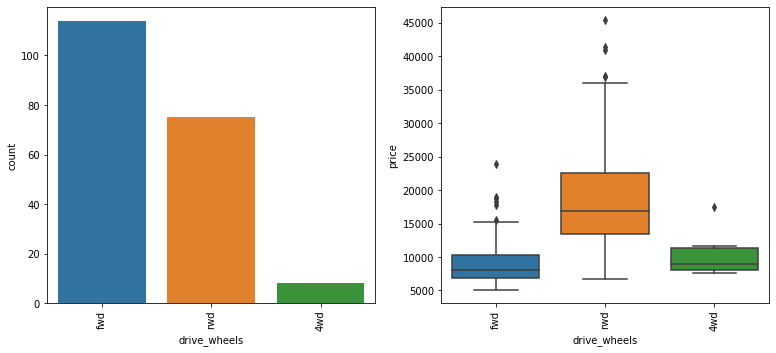

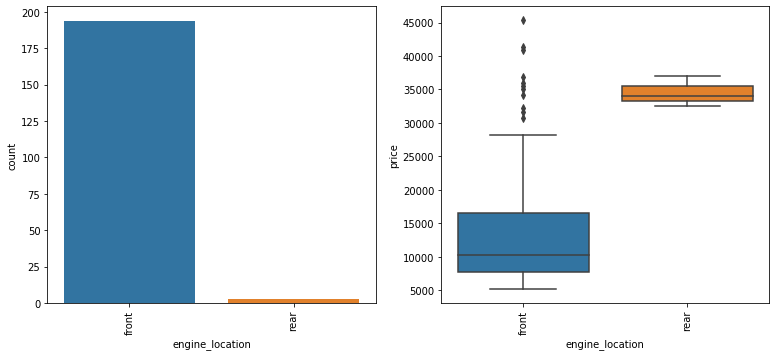

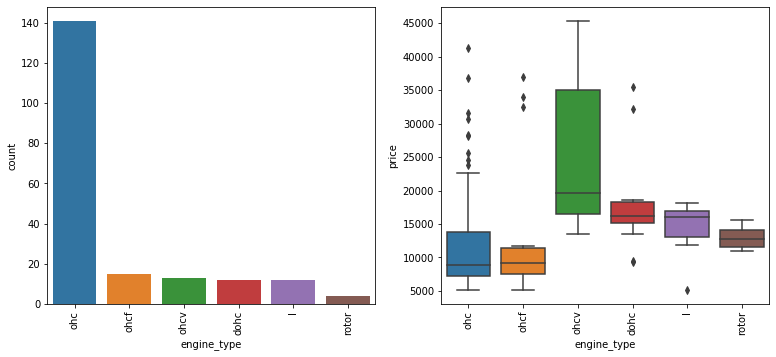

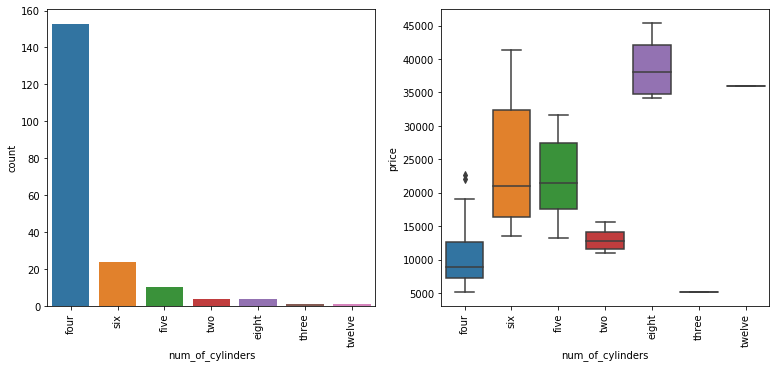

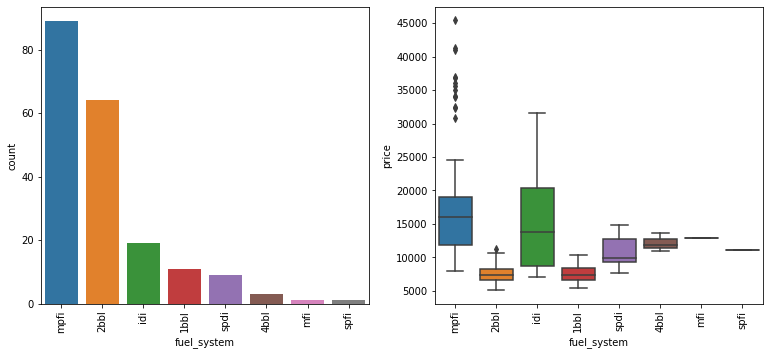

In [19]:
#f,axes=plt.subplots(3,4)
for c in cat_var:
    plt.figure(figsize=(20,12))
    plt.subplot(2,3,1)
    plt.xticks(rotation = 90)
    order = new_df[c].value_counts(ascending=False).index
    sns.countplot(x=c, data=new_df, order=order)
    plt.subplot(2,3,2)
    plt.xticks(rotation = 90)
    sns.boxplot(x=c, data=new_df,y='price',order=order)
    plt.show()

In [20]:
#Getting the number of observations in each category
for i in cat_var:
    print('\nThis is the {} category'.format(i))
    print(new_df[i].value_counts())


This is the make category
toyota           32
nissan           18
mazda            16
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             8
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

This is the fuel_type category
gas       178
diesel     19
Name: fuel_type, dtype: int64

This is the aspiration category
std      162
turbo     35
Name: aspiration, dtype: int64

This is the num_of_doors category
four    112
two      85
Name: num_of_doors, dtype: int64

This is the body_style category
sedan          92
hatchback      67
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

This is the drive_wheels category
fwd    114
rwd     75
4wd      8
Name: drive_wheels, dtype: int64



In [21]:
#This is done already done above so not required
'''fig = plt.figure(figsize=(20,20))

#fig, axes = plt.subplots(4, 3,figsize=(25,25))

for i,var in enumerate(cat_var,1):
    plt.subplot(4,3,i)
    g=sns.boxplot(x=var,y='price',data=new_df)
    if i==1:
        g.set_xticklabels(g.get_xticklabels(),rotation=90)'''

"fig = plt.figure(figsize=(20,20))\n\n#fig, axes = plt.subplots(4, 3,figsize=(25,25))\n\nfor i,var in enumerate(cat_var,1):\n    plt.subplot(4,3,i)\n    g=sns.boxplot(x=var,y='price',data=new_df)\n    if i==1:\n        g.set_xticklabels(g.get_xticklabels(),rotation=90)"

In [22]:
print('Fit the model to the entire dataset and see the results')

Fit the model to the entire dataset and see the results


In [22]:
#Creating dummy variables before splitting
#dum_var=pd.get_dummies(data=new_df,drop_first=True)
X=pd.get_dummies(data=new_df.drop('price',axis=1),drop_first=True)
#X=pd.concat([new_df[num_var],dum_var],axis=1,sort=False)
print(X.head())
#Train Test split
X_train,X_test,y_train,y_test=train_test_split(X,new_df['price'],test_size=0.2,random_state=42)

   length  width  curb_weight  engine_size  horsepower  city_mpg  highway_mpg  \
0   168.8   64.1         2548          130         111        21           27   
1   168.8   64.1         2548          130         111        21           27   
2   171.2   65.5         2823          152         154        19           26   
3   176.6   66.2         2337          109         102        24           30   
4   176.6   66.4         2824          136         115        18           22   

   make_audi  make_bmw  make_chevrolet  ...  num_of_cylinders_three  \
0          0         0               0  ...                       0   
1          0         0               0  ...                       0   
2          0         0               0  ...                       0   
3          1         0               0  ...                       0   
4          1         0               0  ...                       0   

   num_of_cylinders_twelve  num_of_cylinders_two  fuel_system_2bbl  \
0               

In [23]:
dum_cat_var=list(set(X.columns)-set(num_var))
print(dum_cat_var,num_var)

['engine_type_ohc', 'make_dodge', 'fuel_system_2bbl', 'fuel_system_4bbl', 'make_chevrolet', 'make_saab', 'engine_location_rear', 'make_isuzu', 'engine_type_ohcf', 'make_toyota', 'make_subaru', 'drive_wheels_fwd', 'num_of_cylinders_five', 'num_of_cylinders_three', 'body_style_sedan', 'fuel_system_idi', 'make_honda', 'make_volvo', 'make_volkswagen', 'make_mercedes-benz', 'make_jaguar', 'make_mazda', 'make_peugot', 'body_style_wagon', 'make_audi', 'make_mitsubishi', 'num_of_doors_two', 'num_of_cylinders_twelve', 'aspiration_turbo', 'fuel_system_mfi', 'make_plymouth', 'fuel_type_gas', 'make_bmw', 'drive_wheels_rwd', 'engine_type_rotor', 'make_porsche', 'num_of_cylinders_six', 'num_of_cylinders_four', 'fuel_system_mpfi', 'make_nissan', 'body_style_hatchback', 'body_style_hardtop', 'fuel_system_spdi', 'fuel_system_spfi', 'engine_type_l', 'num_of_cylinders_two', 'engine_type_ohcv', 'make_mercury'] ['width', 'length', 'horsepower', 'engine_size', 'curb_weight', 'highway_mpg', 'city_mpg']


In [24]:
#Can I Use this here? If not delete this cell and the next cell
#Need to work on this
def model(X,y,modl,cv):
    '''A function for fitting, getting the metric, plotting the residual plot, normality plot, cross_val_score'''
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
    
    num_var=list(set(X.columns)-set(dum_cat_var))
    scaler=StandardScaler()
    scaler.fit(X_train[num_var])
    
    X_train_scld=pd.DataFrame(scaler.transform(X_train[num_var]),columns=num_var,index=X_train.index)
    X_train_full=pd.concat([X_train_scld,X_train[dum_cat_var]],axis=1,sort=False)
    
    X_test_scld=pd.DataFrame(scaler.transform(X_test[num_var]),columns=num_var,index=X_train.index)
    X_test_full=pd.concat([X_test_scld,X_test[dum_cat_var]],axis=1,sort=False)
    
    modl.fit(X_train_full,y_train)
    print(f'The R-square value for Linear Regression is : {modl.score(X_test_full_,y_test)}')
    print(f'R2 score : {r2_score(y_test.values.reshape(-1,1),modl.predict(X_test_full).reshape(-1,1))}')
    cross_val=cross_val_score(modl,X,y,cv=cv,scoring='r2')
    print(f'The Cross validation results are : {cross_val}')
    print(f'Mean of Cross validation : {np.mean(cross_val)}')
    #Residual plot:
    plt.figure(1)
    residual = y - modl.predict(X_scaled)
    plt.scatter(modl.predict(X_scaled),residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    #Normal Probability plot:
    plt.figure(2)
    probplot(residual,plot=plt)
    plt.show()

In [25]:
model(X,new_df['price'],LinearRegression(),5)

ValueError: Shape of passed values is (40, 7), indices imply (157, 7)

In [26]:
#Fitting the StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[num_var])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
#Check again whether this function is required
def scale_dummy(X):
    '''The argument is X after dummy variables creation. Returns X with continuous variables scaled'''
    X_num_scaled=pd.DataFrame(scaler.transform(X[num_var]),columns=num_var,index=X.index)
    dum_cat_var=list(set(X.columns)-set(num_var))
    X_concat=pd.concat([X_num_scaled,X[dum_cat_var]],axis=1,sort=False)
    return X_concat

In [28]:
X_train_scaled = scale_dummy(X_train)
X_train_scaled.head()

,width,length,horsepower,engine_size,curb_weight,highway_mpg,city_mpg,engine_type_ohc,make_dodge,fuel_system_2bbl,...,fuel_system_mpfi,make_nissan,body_style_hatchback,body_style_hardtop,fuel_system_spdi,fuel_system_spfi,engine_type_l,num_of_cylinders_two,engine_type_ohcv,make_mercury
5,0.209331,0.244796,0.227986,0.328514,-0.092662,-0.862746,-1.006636,1,0,0,...,1,0,0,0,0,0,0,0,0,0
70,2.854203,2.333637,0.613183,1.691901,2.417805,-0.862746,-0.510689,1,0,0,...,0,0,0,0,0,0,0,0,0,0
145,-0.231481,-0.192787,0.257616,-0.483717,-0.086699,-0.239982,-0.180057,0,0,0,...,1,0,0,0,0,0,0,0,0,0
102,0.307289,0.847505,1.472470,1.633885,1.475634,-1.329819,-1.337267,0,0,0,...,1,1,0,0,0,0,0,0,1,0
177,0.307289,0.104439,-0.305365,-0.077602,-0.190060,0.227091,0.315890,1,0,0,...,1,0,1,0,0,0,0,0,0,0


In [29]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
print("The training R square value is :",lr.score(X_train_scaled,y_train))
print("The testing R square value is :",lr.score(scale_dummy(X_test),y_test))

The training R square value is : 0.9695194946721136
The testing R square value is : 0.8841209782970456


In [ ]:
#Using cross validation to confirm poor prediction of the model

The model overfits the training set. This can be seen from the high training R square and low testing R square. The features must be reduced.

               length     width  curb_weight  engine_size  horsepower  \
length       1.000000  0.856495     0.882718     0.684888    0.586110   
width        0.856495  1.000000     0.867289     0.729046    0.620057   
curb_weight  0.882718  0.867289     1.000000     0.848932    0.759925   
engine_size  0.684888  0.729046     0.848932     1.000000    0.825286   
horsepower   0.586110  0.620057     0.759925     0.825286    1.000000   
city_mpg    -0.676796 -0.642865    -0.755559    -0.655737   -0.821960   
highway_mpg -0.710573 -0.690699    -0.800113    -0.684662   -0.803658   
price        0.694556  0.754249     0.834732     0.873708    0.811953   

             city_mpg  highway_mpg     price  
length      -0.676796    -0.710573  0.694556  
width       -0.642865    -0.690699  0.754249  
curb_weight -0.755559    -0.800113  0.834732  
engine_size -0.655737    -0.684662  0.873708  
horsepower  -0.821960    -0.803658  0.811953  
city_mpg     1.000000     0.972407 -0.692948  
highway_mpg  

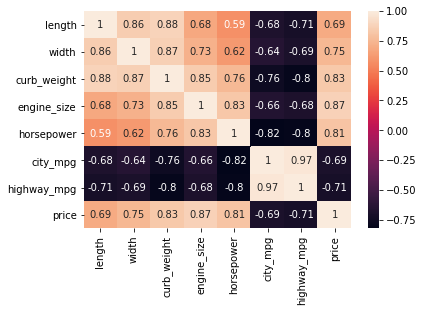

In [30]:
#Finding the correlation and eliminating continuous variables
print(new_df.corr())
sns.heatmap(new_df.corr(),annot=True)

<class 'pandas.core.frame.DataFrame'>


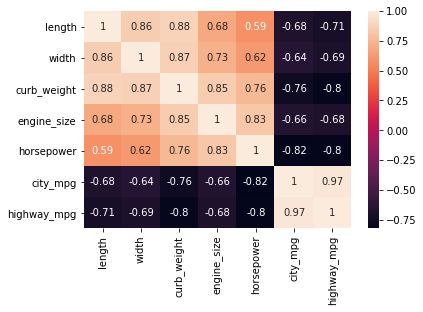

In [31]:
#Heat map to find the correlations
cols=['length','width','curb_weight','engine_size','horsepower','city_mpg','highway_mpg']
std_X=scale_dummy(new_df[cols])
print(type(std_X))
sns.heatmap(std_X[cols].corr(),annot=True)

In [90]:
new_df.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'length', 'width', 'curb_weight',
       'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system',
       'horsepower', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

The above correlation matrix and heatmap supports the previous analysis showing high correlation between variables.

             length     width  curb_weight  engine_size  horsepower  city_mpg  \
length          NaN  0.856495     0.882718     0.684888    0.586110  0.676796   
width           NaN       NaN     0.867289     0.729046    0.620057  0.642865   
curb_weight     NaN       NaN          NaN     0.848932    0.759925  0.755559   
engine_size     NaN       NaN          NaN          NaN    0.825286  0.655737   
horsepower      NaN       NaN          NaN          NaN         NaN  0.821960   
city_mpg        NaN       NaN          NaN          NaN         NaN       NaN   
highway_mpg     NaN       NaN          NaN          NaN         NaN       NaN   

             highway_mpg  
length          0.710573  
width           0.690699  
curb_weight     0.800113  
engine_size     0.684662  
horsepower      0.803658  
city_mpg        0.972407  
highway_mpg          NaN  
['width', 'curb_weight', 'highway_mpg']


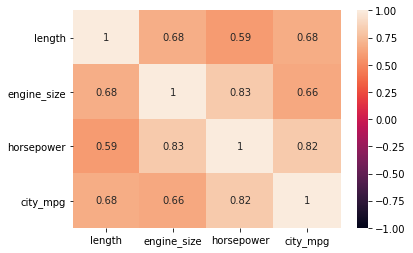

{'engine_size', 'city_mpg', 'length', 'horsepower'}


In [32]:
#Dropping correlated features
new_df2=new_df.copy()
new_df2.drop('price',axis=1,inplace=True)
corr_matrix = new_df2.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)
X_uncor = new_df2.drop(to_drop, axis=1)
sns.heatmap(X_uncor.corr().abs(),vmin=-1,vmax=1,annot=True)
plt.show()
num_var_uncor=set(num_var).intersection(set(X_uncor.columns))
print(num_var_uncor)

In [33]:
print('All the correlated features are removed. The removed features are : ', to_drop)

All the correlated features are removed. The removed features are :  ['width', 'curb_weight', 'highway_mpg']


In [34]:
#Funtion to fit the model
scores=['neg_mean_absolute_error','neg_root_mean_squared_error','neg_median_absolute_error','r2']

def model(X,y,modl,cv):
    '''A function for fitting, getting the metric, plotting the residual plot, normality plot, cross_val_score'''
    #X_scaled=scale_dummy(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=2)
    
    modl.fit(X_train,y_train)
    
    print('Below are metrics for the model')
    #print(f'The R-square value for Linear Regression is : {modl.score(X_test,y_test)}')
    print(f'R-sqaure : {r2_score(y_test.values.reshape(-1,1),modl.predict(X_test).reshape(-1,1))}')
    print(f'MAE : {mean_absolute_error(y_test.values.reshape(-1,1),modl.predict(X_test).reshape(-1,1))}')
    print(f'RMSE : {np.sqrt(mean_absolute_error(y_test.values.reshape(-1,1),modl.predict(X_test).reshape(-1,1)))}')
    
    #cross validation
    scores=['neg_mean_absolute_error','neg_root_mean_squared_error','neg_median_absolute_error','r2']
    #cross_val=cross_val_score(modl,X,y,cv=cv,scoring='r2')
    #print(f'The Cross validation results are : {cross_val}')
    #print(f'Mean of Cross validation : {np.mean(cross_val)}')
    print('\nBelow are the cross validation scores')
    cross_val=cross_validate(modl,X,y,cv=cv,scoring=scores)
    avg_score={}
    for k,v in cross_val.items():
        avg_score[k] = sum(v)/float(len(v))
        print(f'{k} : {-np.mean(v)}')
        

    #Residual plot:
    plt.figure(1)
    residual = y - modl.predict(X)
    plt.scatter(modl.predict(X),residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    #Normal Probability plot:
    plt.figure(2)
    probplot(residual,plot=plt)
    #Distplot of Residuals
    plt.figure(3)
    sns.distplot(residual)
    plt.show()

Below are metrics for the model
R-sqaure : 0.8526286930286565
MAE : 2139.38285256118
RMSE : 46.25346314127386

Below are the cross validation scores
fit_time : -0.0018792152404785156
score_time : -0.002873945236206055
test_neg_mean_absolute_error : 3621.2170602267774
test_neg_root_mean_squared_error : 4869.531391718651
test_neg_median_absolute_error : 2614.8036790217784
test_r2 : -0.4360712877857969


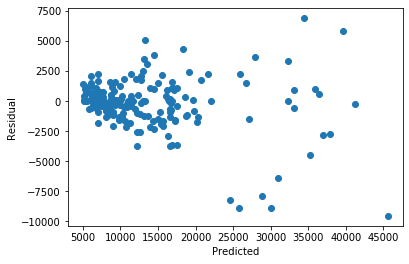

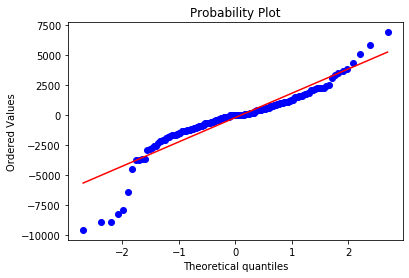

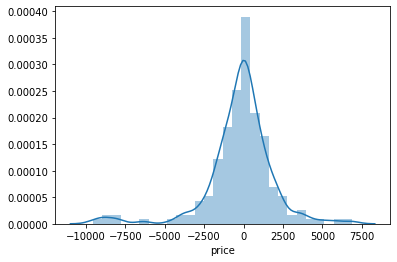

In [35]:
#new variable X_1 with uncorrelated continuous features
#Standard Scaler is also known as z score
X_1 = X.drop(to_drop,axis=1)
scaler1=StandardScaler()
scaler1.fit(X_1[num_var_uncor])
X_1_scaled=pd.DataFrame(scaler1.transform(X_1[num_var_uncor]),columns=num_var_uncor,index=X_1.index)
X_1_con=pd.concat([X_1_scaled,X_1[dum_cat_var]],axis=1,sort=False)

model(X_1_con,new_df['price'],LinearRegression(),5)

Below are metrics for the model
R-sqaure : 0.9482582337081361
MAE : 1568.291674615922
RMSE : 39.601662523383055

Below are the cross validation scores
fit_time : -0.004094362258911133
score_time : -0.002201700210571289
test_neg_mean_absolute_error : 3296.3235914505435
test_neg_root_mean_squared_error : 4668.628793365093
test_neg_median_absolute_error : 2159.469009111026
test_r2 : -0.44691399934817716


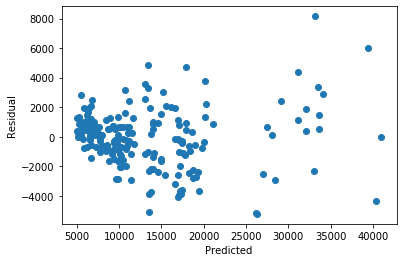

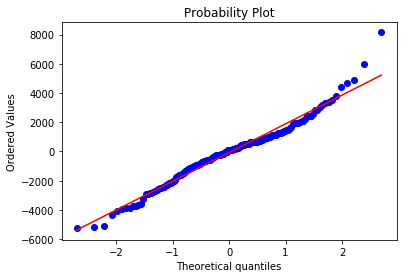

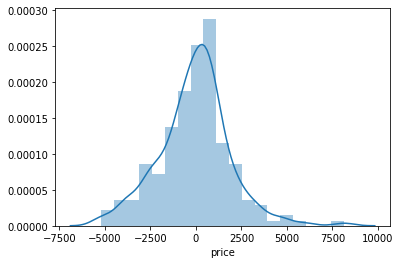

In [157]:
#Ridge
model(X_1_con,new_df['price'],Ridge(),5)

Below are metrics for the model
R-sqaure : 0.8664677506274333
MAE : 2062.1676171585796
RMSE : 45.41109574937143

Below are the cross validation scores
fit_time : -0.005740213394165039
score_time : -0.0014914989471435547
test_neg_mean_absolute_error : 3631.407043804302
test_neg_root_mean_squared_error : 4970.673181815559
test_neg_median_absolute_error : 2533.230004051465
test_r2 : -0.42833220849608117


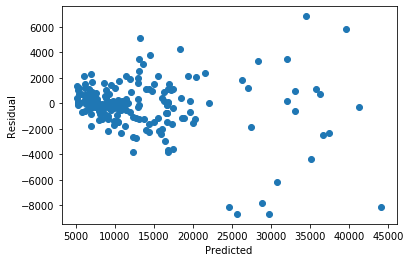

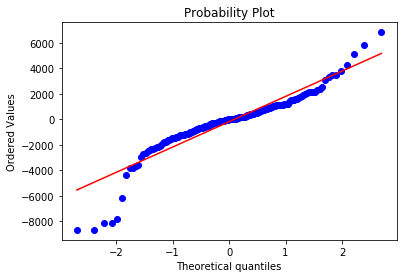

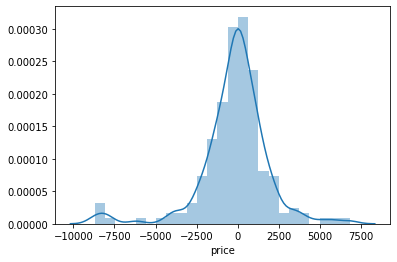

In [36]:
#Lasso
model(X_1_con,new_df['price'],Lasso(),5)

The above outputs indicates that the errors are not constant which violates the assumption of constant variance in error. So will be trying to use transformation.

In [37]:
#Power Transformation on Y and Ridge with scaled, uncorrelated variables
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='box-cox')
y_pt=pt.fit_transform(new_df.loc[:,['price']])
y_pt_df=pd.Series(y_pt.reshape(197,),index=new_df.index)
cv_score=cross_val_score(Ridge(alpha=30),X_1_con,y_pt_df,cv=5)
print(cv_score,cv_score.mean())
#model(X_1_con,y_pt_df,rr,5)

[0.90661321 0.88646634 0.85196801 0.85350962 0.61157228] 0.8220258914645727


Below are metrics for the model
R-sqaure : 0.9488003668078663
MAE : 0.20379169644307743
RMSE : 0.45143293681684044

Below are the cross validation scores
fit_time : -0.003240966796875
score_time : -0.002614736557006836
test_neg_mean_absolute_error : 0.377558969949292
test_neg_root_mean_squared_error : 0.48446871383146395
test_neg_median_absolute_error : 0.3026228173999437
test_r2 : -0.7022927475914511


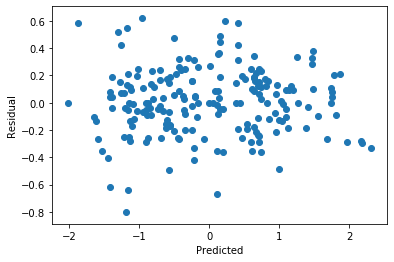

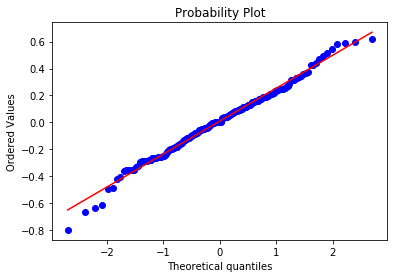

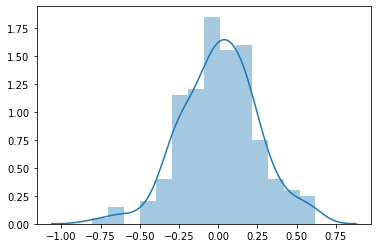

In [38]:
#Linear Regression with power transformed Y and scaled uncorrelated
model(X_1_con,y_pt_df,LinearRegression(),5)

Below are metrics for the model
R-sqaure : 0.9533121904675621
MAE : 0.20146568803674914
RMSE : 0.44884929323409783

Below are the cross validation scores
fit_time : -0.0035703182220458984
score_time : -0.003154087066650391
test_neg_mean_absolute_error : 0.3041250942431767
test_neg_root_mean_squared_error : 0.3882218470918242
test_neg_median_absolute_error : 0.2441960878999863
test_r2 : -0.7927629213757177


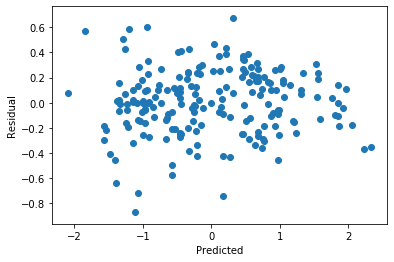

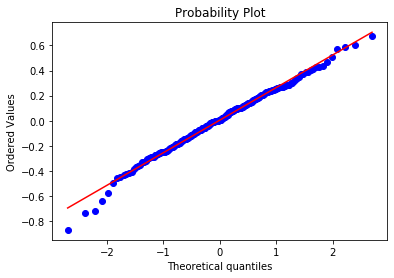

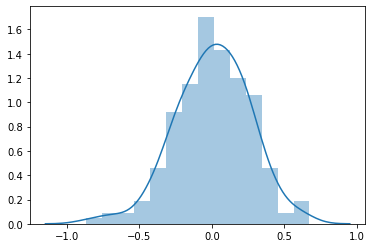

In [39]:
#Ridge
model(X_1_con,y_pt_df,Ridge(),5)

In [40]:
#Getting the co efficients of variables
rr1=Ridge()
rr1.fit(X=X_1_con,y=y_pt_df)
ridge_coefs={X_1_con.columns[i]:rr1.coef_[i] for i in range(len(rr1.coef_))}
print(pd.DataFrame(sorted(ridge_coefs.items(), key = lambda kv:kv[1],reverse=True))) 

                          0         1
0              make_porsche  0.440369
1                  make_bmw  0.340194
2                 make_audi  0.250591
3           fuel_system_idi  0.244272
4                    length  0.226868
5          fuel_system_spfi  0.226491
6      engine_location_rear  0.200898
7          fuel_system_mpfi  0.190312
8          aspiration_turbo  0.166879
9               engine_size  0.141002
10               horsepower  0.116833
11                make_saab  0.109158
12           make_chevrolet  0.099586
13   num_of_cylinders_three  0.095838
14               make_honda  0.074306
15          fuel_system_mfi  0.072765
16         drive_wheels_rwd  0.072730
17     num_of_cylinders_two  0.063860
18        engine_type_rotor  0.063860
19         fuel_system_spdi  0.054049
20       make_mercedes-benz  0.052417
21          engine_type_ohc  0.052361
22               make_mazda  0.029702
23         engine_type_ohcf  0.006609
24    num_of_cylinders_five -0.020333
25         f

Below are metrics for the model
R-sqaure : -0.08264102501473802
MAE : 1.0225200946458437
RMSE : 1.0111973569219035

Below are the cross validation scores
fit_time : -0.003809547424316406
score_time : -0.002256298065185547
test_neg_mean_absolute_error : 0.8639044035027694
test_neg_root_mean_squared_error : 0.994178029234317
test_neg_median_absolute_error : 0.8431763286583228
test_r2 : 0.11259854178462932


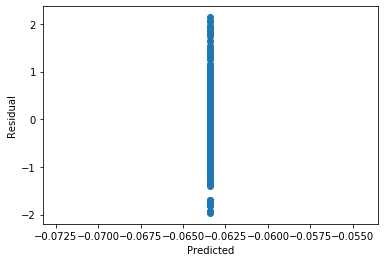

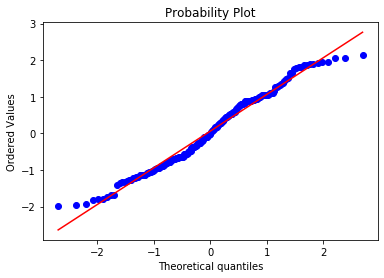

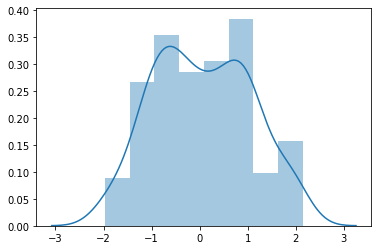

In [41]:
#Power Transformed Lasso
model(X_1_con,y_pt_df,Lasso(),5)

Lasso regression did not work well in this case

Below are metrics for the model
R-sqaure : 0.8930410376301923
MAE : 0.2560785843472512
RMSE : 0.5060420776449832

Below are the cross validation scores
fit_time : -0.0058440685272216795
score_time : -0.0031960010528564453
test_neg_mean_absolute_error : 0.36934108309526803
test_neg_root_mean_squared_error : 0.4839811091499858
test_neg_median_absolute_error : 0.2904787200514027
test_r2 : -0.6703670455784672


C:\Users\pnish\.conda\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


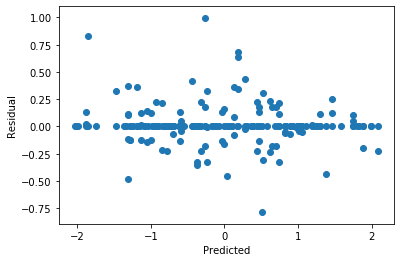

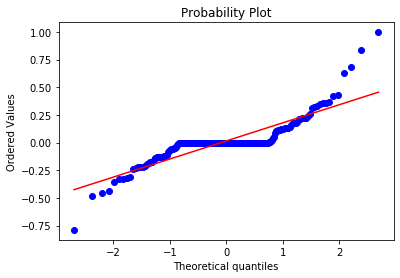

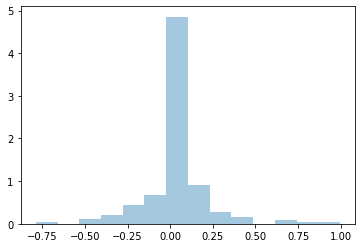

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
model(X_1_con,y_pt_df,dtr,5)

Decision Tree model is also not a suitable one for this data.

Below are metrics for the model
R-sqaure : 0.9382905414736302
MAE : 0.2267285695273455
RMSE : 0.4761602351387036

Below are the cross validation scores
fit_time : -0.007163238525390625
score_time : -0.00060577392578125
test_neg_mean_absolute_error : 0.3355410778568173
test_neg_root_mean_squared_error : 0.4402332347806423
test_neg_median_absolute_error : 0.23531668768488484
test_r2 : -0.7497521253262031


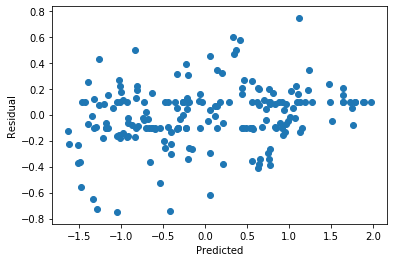

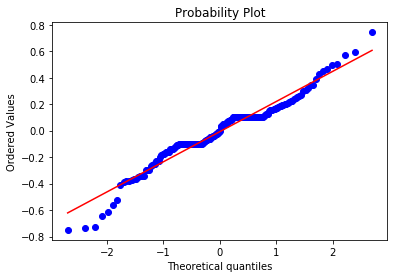

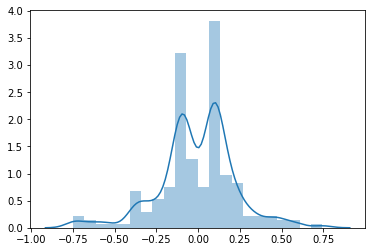

In [43]:
from sklearn.svm import SVR
svr=SVR()
model(X_1_con,y_pt_df,svr,5)

Below are metrics for the model
R-sqaure : 0.9666424291984588
MAE : 0.08572546734386743
RMSE : 0.2927891175297802

Below are the cross validation scores
fit_time : -0.0022264957427978516
score_time : -0.002997016906738281
test_neg_mean_absolute_error : 0.16714317066128748
test_neg_root_mean_squared_error : 0.21362016045879267
test_neg_median_absolute_error : 0.13109212481586283
test_r2 : -0.747505705423281


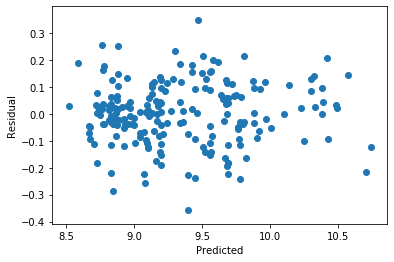

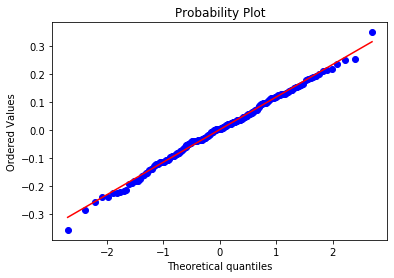

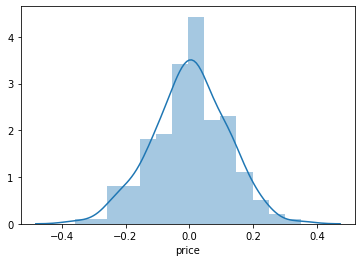

In [44]:
#Using Log Transforamtion Ridge
y_log=np.log(np.abs(new_df.loc[:,'price']))
type(y_log)
model(X_1_con,y_log,Ridge(),5)

Below are metrics for the model
R-sqaure : -0.09697291411251374
MAE : 0.5046977358531957
RMSE : 0.7104208160331422

Below are the cross validation scores
fit_time : -0.0025661468505859377
score_time : -0.0017615795135498048
test_neg_mean_absolute_error : 0.42266058966622405
test_neg_root_mean_squared_error : 0.49718311138963645
test_neg_median_absolute_error : 0.40801782160936784
test_r2 : 0.09148638726189114


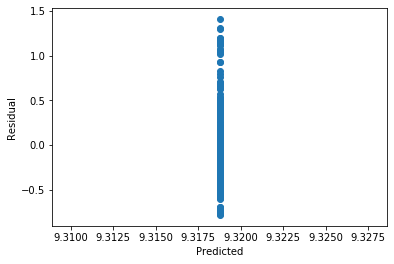

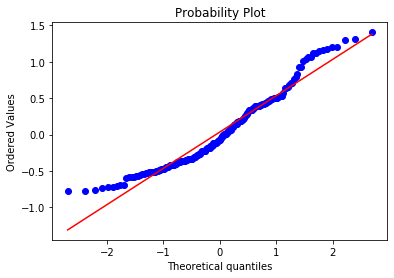

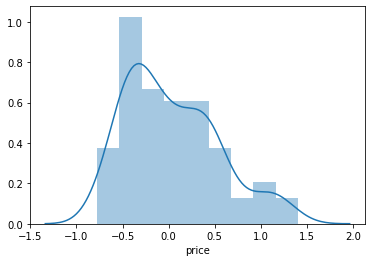

In [45]:
#Log transformed y in Lasso
model(X_1_con,y_log,Lasso(),5)

Below are metrics for the model
R-sqaure : 0.9544778546842505
MAE : 0.09584831133209386
RMSE : 0.30959378438866286

Below are the cross validation scores
fit_time : -0.0036104202270507814
score_time : -0.001918935775756836
test_neg_mean_absolute_error : 0.19239906854773298
test_neg_root_mean_squared_error : 0.2431084710164793
test_neg_median_absolute_error : 0.1709413609066793
test_r2 : -0.7065953067273416


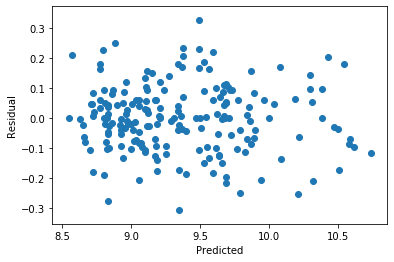

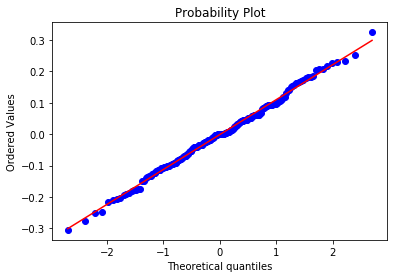

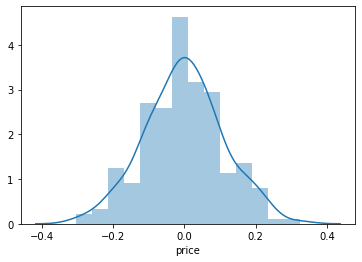

In [46]:
#Log Tranformed y in Linear Regression
model(X_1_con,y_log,LinearRegression(),5)

Ridge Regression with Log Transformed response variable seems to be a better model

Below are metrics for the model
R-sqaure : 0.9666424291984588
MAE : 0.08572546734386743
RMSE : 0.2927891175297802

Below are the cross validation scores
fit_time : -0.17240490913391113
score_time : -0.004130363464355469
test_neg_mean_absolute_error : 0.15669263553478077
test_neg_root_mean_squared_error : 0.2033790765816955
test_neg_median_absolute_error : 0.1188124154550648
test_r2 : -0.7635310608157979


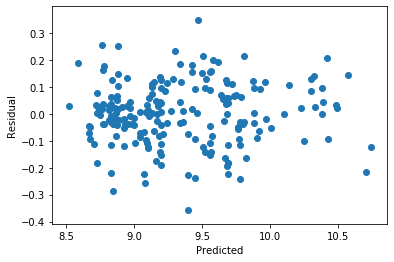

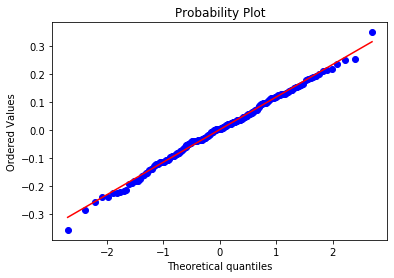

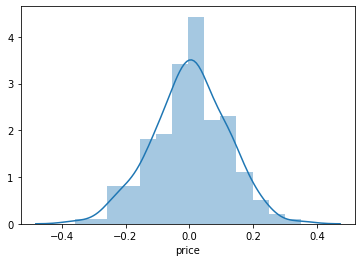

In [47]:
#Paramter tuning using Grid search for choosing the best alpha parameter for Ridge Regression
grid_vals = {'alpha':[.01,.1,1,10,100]}
gs = GridSearchCV(estimator=Ridge(),param_grid=grid_vals,scoring='r2')
model(X_1_con,y_log,gs,5)

In [48]:
print(gs.best_params_)

{'alpha': 1}


Below are metrics for the model
R-sqaure : 0.9634474028646955
MAE : 0.08964949847648924
RMSE : 0.29941526092784454

Below are the cross validation scores
fit_time : -0.1830916404724121
score_time : -0.0025868892669677736
test_neg_mean_absolute_error : 0.1639470910022392
test_neg_root_mean_squared_error : 0.2099462584703961
test_neg_median_absolute_error : 0.13338623010398667
test_r2 : -0.7563800356481605


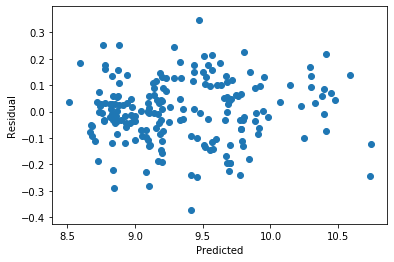

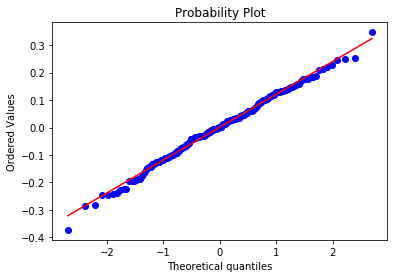

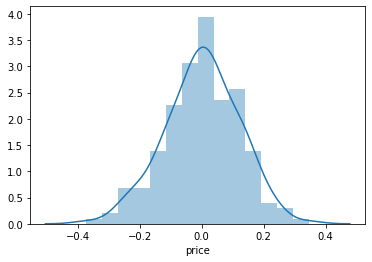

In [49]:
#Grid search for choosin parameters of Ridge Regression
grid_vals = {'alpha':[0,0.5,1,1.5,2]}
gs2 = GridSearchCV(estimator=Ridge(),param_grid=grid_vals,scoring='r2')
model(X_1_con,y_log,gs2,5)

In [50]:
print(gs2.best_params_)

{'alpha': 1.5}


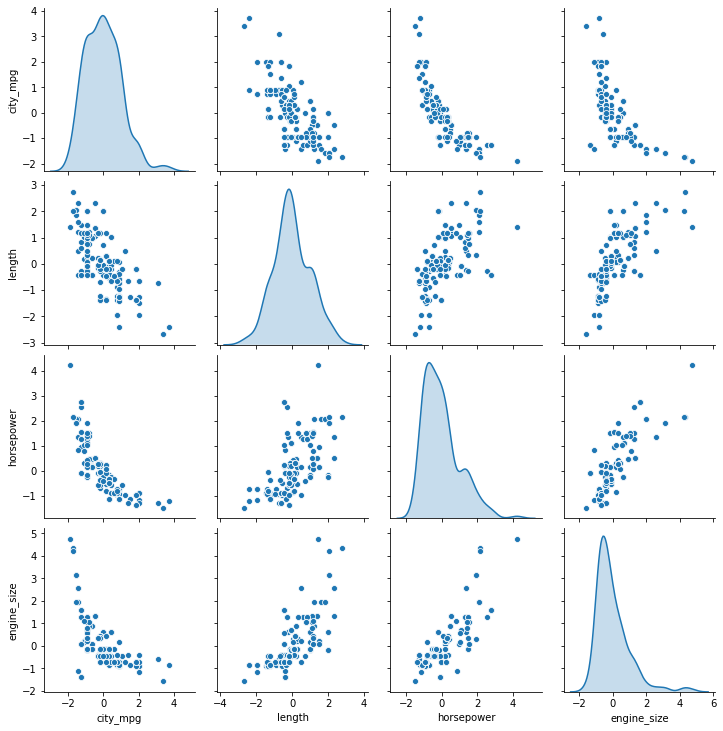

In [189]:
#Considering only the continuous variabbles
sns.pairplot(X_1_con[['city_mpg', 'length', 'horsepower', 'engine_size']],diag_kind='kde')
plt.show()

In [190]:
X_1_con[['city_mpg', 'length', 'horsepower', 'engine_size']].corr()

,city_mpg,length,horsepower,engine_size
city_mpg,1.000000,-0.676796,-0.821960,-0.655737
length,-0.676796,1.000000,0.586110,0.684888
horsepower,-0.821960,0.586110,1.000000,0.825286
engine_size,-0.655737,0.684888,0.825286,1.000000


Below are metrics for the model
R-sqaure : 0.8180224310782181
MAE : 0.18225435494672992
RMSE : 0.42691258466661525

Below are the cross validation scores
fit_time : -0.0019945144653320313
score_time : -0.0009973526000976562
test_neg_mean_absolute_error : 0.17089461872597908
test_neg_root_mean_squared_error : 0.2197854482575549
test_neg_median_absolute_error : 0.1373728517439899
test_r2 : -0.7514767134525835


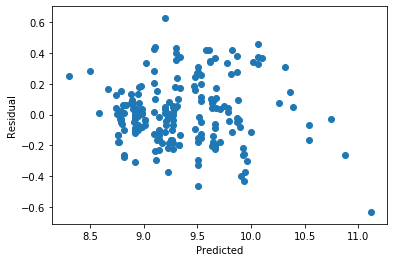

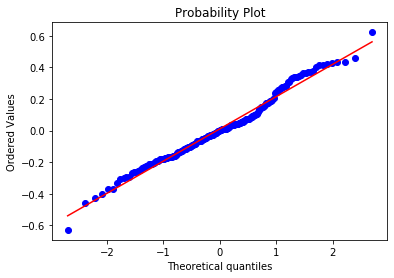

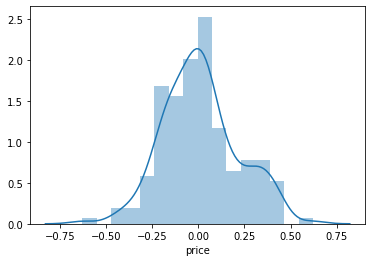

In [196]:
model(X_1_con[['city_mpg', 'length', 'horsepower', 'engine_size']],y_log,Ridge(alpha=1.5),5)

In [51]:
#function for adjusted R-square
def adj_r_sqr(X,y,mod):
    mod.fit(X,y)
    pred_y = mod.predict(X)
    n = X.shape[0]
    k = X.shape[1]
    ss_res=0
    ss_tot=0
    ss_reg=0
    for i in range(0,n):
        ss_res+=(y.values[i]-pred_y[i])**2
        ss_tot+=(y.values[i]-y.mean())**2
        ss_reg+=(pred_y[i]-y.mean())**2
    r_sqr = 1 - (ss_res/ss_tot)
    adj_r_sqr = 1 - (1-r_sqr)*((n-1)/(n-k-1))
    MS_R = ss_reg/k
    MS_Res = ss_res/(n-k-1)
    F_val = MS_R/MS_Res
    print(f'R-Squared : {r_sqr}')
    print(f'Adjusted R-Square : {adj_r_sqr}')
    print(f'F-value : {F_val}')

In [52]:
adj_r_sqr(X_1_con,y_log,Ridge())

R-Squared : 0.9508947731428352
Adjusted R-Square : 0.9331623301110813
F-value : 52.503184067204145


In [56]:
#Seeing the predicted result
X1_train,X1_test,ytrain,ytest=train_test_split(X_1_con,y_log,test_size=0.2,random_state=42)
rr=Ridge(alpha=1.5)
rr.fit(X1_train,ytrain)
ypred_log=rr.predict(X1_test)
print(ypred_log)

[ 9.06888426  8.71347906 10.42269997  9.22987249  8.96623166  9.72477389
 10.4953335   9.16097995  8.77274261  9.76108793  9.13286439 10.33941273
  9.36384135  9.66131872  8.82585348  9.12042289  8.89852634  9.58740452
  8.70074934  9.94513294  9.7589876   8.71265696  9.12944771 10.70578031
  8.86776223 10.23124788  8.89852634  9.0008687   8.71411367 10.70455065
  9.26699177  9.70079599  9.26881636  8.789433    8.89841907  9.10032388
  9.20235819  8.83470579 10.27142202  9.01043561]


In [57]:
test_actual=new_df.loc[ytest.index]['price'].sort_index(axis=0)
pred_untrans=pd.DataFrame(np.exp(ypred_log),index=ytest.index,columns=['Predicted']).sort_index()
print(pd.concat([test_actual,pred_untrans],axis=1))

     price     Predicted
10   16430  14579.978358
16   41315  30927.861842
17   36880  33614.068867
19    6295   6455.854118
20    6575   6868.532775
25    6692   6564.509046
32    5399   6088.236034
49   36000  44612.988352
59    8845   9518.380071
60    8495   9920.495905
65   18280  15698.472962
72   35056  27757.126140
73   40960  44558.163262
74   45400  36146.431041
78    6669   6007.412137
80    9959  10197.241133
81    8499   8188.087329
87    9279  10582.868237
90    7099   7099.376432
98    8249   6079.373697
100   9549   8958.193649
117  18150  17309.099038
118   5572   6084.373615
119   7957   9140.066026
120   6229   6807.998724
124  12764  16330.600984
127  34028  28894.947211
140   7603   7320.391352
147  10198   9222.926832
148   8013   8680.932694
154   7898   7321.176680
155   8778   7321.176680
163   8058   7834.024671
170  11199  11659.089308
178  16558  17345.492066
182   7775   8110.126107
183   7975   9254.492538
192  13845  10602.195291
194  12940  16726.906897


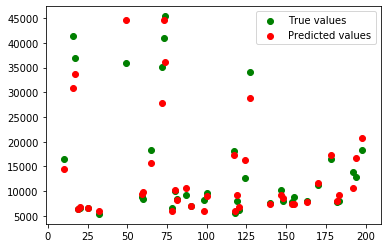

In [61]:
#Plotting Actual vs Predicted
plt.scatter(test_actual.index,test_actual,color='green')
plt.scatter(pred_untrans.index,pred_untrans,color='red')
plt.legend(['True values','Predicted values'])
plt.show()